In [29]:
# Imports
import numpy as np
import pandas as pd

# Method classes
%reload_ext autoreload
from src.up_and_out_pricers import (
    UpAndOutFD, UpAndOutMC, up_and_out_call_analytic,
)
from src.partial_up_and_out_pricers import (
    PartialUpAndOutFD, PartialUpAndOutMC
)
from src.modified_up_and_out_pricers import (
    ModifiedUpAndOutFD, ModifiedUpAndOutMC
)
from src.convergence_tests import (
    fd_convergence, mc_convergence,
    plot_fd_convergence_results, plot_mc_convergence_results
)
from src.comparison import comparison

# Set seed
np.random.seed(1)

# Barrier Options

### Finite Difference Method

In [30]:
# Example
pricer = UpAndOutFD(
    S0=100, h = lambda x: np.maximum(x-100, 0.0), B=130,
    T=1.0, r=0.05, sigma=0.2, M=1000, N=1000
)

price = pricer.price()
print(f"FD Price: {price:.4f}")

FD Price: 3.3337


### Monte-Carlo Method

In [31]:
# Example
pricer = UpAndOutMC(
    S0=100, h = lambda x: np.maximum(x-100, 0.0), B=130,
    T=1.0, r=0.05, sigma=0.2, n_sims=10000, n_steps=1000
)

price = pricer.price()
print(f"MC Price: {price:.4f}")

MC Price: 3.4000


### Analytical Price
See Wilmott for details on the formula [pp.408-409]

In [32]:
# Example
analytic_price = up_and_out_call_analytic(
    S0=100, K=100, B=130, T=1.0, t=0, r=0.05, sigma=0.2, q=0
)

print(f"Analytic Price: {analytic_price:.4f}")

Analytic Price: 3.3329


### Finite Difference Convergence

In [33]:
# Define param grid
params = {
    "S0":100,
    "h":lambda x: np.maximum(x - 100, 0.0),
    "B":130,
    "T":1.0,
    "r":0.05,
    "sigma":0.2,
}

# Create Ms list
Ms = range(25, 501, 25)

# Run FD convergence test
Ms, fd_prices, fd_times = fd_convergence(UpAndOutFD, params, Ms)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.32it/s]


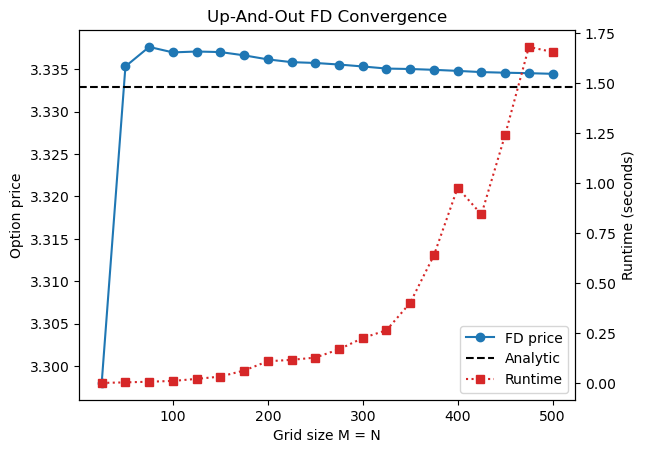

In [34]:
# Plot FD convergence results
plot_fd_convergence_results(
    size=Ms, 
    prices=fd_prices,
    times=fd_times,
    title="Up-And-Out FD Convergence",
    savefile="up_and_out_fd_convergence.png",
    analytic_price=analytic_price
)

### Monte-Carlo Convergence

In [35]:
# Use log scale for simulation sizes
Ns = np.logspace(3,6,25, dtype=int)

# Run MC convergence test
Ns, mc_prices, mc_errs, mc_times = mc_convergence(
   UpAndOutMC, params, Ns, 252*4
)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [14:10<00:00, 34.02s/it]


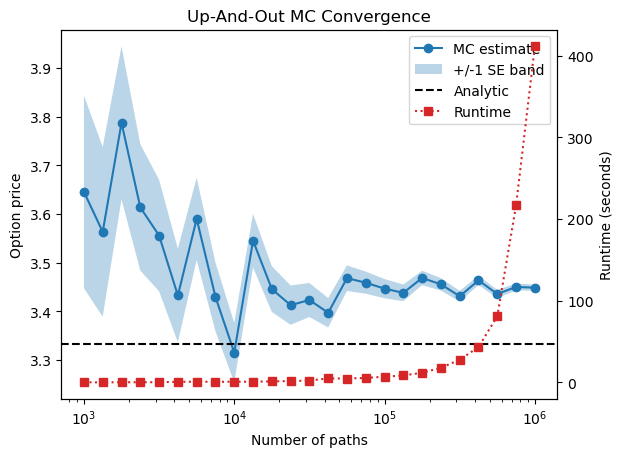

In [36]:
mc_prices = np.array(mc_prices)
mc_errs = np.array(mc_errs)
mc_times = np.array(mc_times)

# Plot FD convergence results
plot_mc_convergence_results(
    size=Ns, 
    prices=mc_prices,
    errs=mc_errs,
    times=mc_times,
    title="Up-And-Out MC Convergence",
    savefile="up_and_out_mc_convergence.png",
    analytic_price=analytic_price
)

### FD vs MC Comparison

In [37]:
# Get data for comparison
data = [
    ("Analytic", "-", analytic_price),
    ("FD", f"M=N={Ms[5]}", fd_prices[5]),
    ("FD", f"M=N={Ms[10]}", fd_prices[10]),
    ("FD", f"M=N={Ms[-1]}", fd_prices[-1]),
    ("MC", f"{Ns[-3]//1000}k paths", mc_prices[2]),
    ("MC", f"{Ns[-1]//1000}k paths", mc_prices[-1]),
]

df = comparison(data, analytic_price, errors=True)

# Save data
df.to_csv("fd_vs_mc_comparison.csv")

# Print data
df

,Method,Parameters,Price,Absolute Error,Relative Error
0,Analytic,-,3.332858,0.000000,0.000000
1,FD,M=N=150,3.337019,0.004161,0.001249
2,FD,M=N=275,3.335550,0.002692,0.000808
3,FD,M=N=500,3.334455,0.001598,0.000479
4,MC,562k paths,3.787350,0.454492,0.136367
5,MC,1000k paths,3.448868,0.116011,0.034808


# Partial Barrier Options

### Finite Difference Method

In [38]:
# Example of partial FD pricer
pricer = PartialUpAndOutFD(
    S0=100, h = lambda x: np.maximum(x-100, 0.0), B=130, Pi=[(0,0.5)],
    T=1.0, r=0.05, sigma=0.2, x_max=1000, M=1000, N=1000
)

price = pricer.price()
print(f"FD Price: {price:.4f}")

FD Price: 7.9226


### Monte Carlo Method

In [39]:
# Example of partial MC pricer
pricer = PartialUpAndOutMC(
    S0=100, h = lambda x: np.maximum(x-100, 0.0), B=130, Pi=[(0,0.5)],
    T=1.0, r=0.05, sigma=0.2, n_sims=10000, n_steps=1000, 
)

price = pricer.price()
print(f"FD Price: {price:.4f}")

FD Price: 8.2197


### Finite Difference Convergence

In [40]:
# Define param grid
params = {
    "S0":100,
    "h":lambda x: np.maximum(x - 100, 0.0),
    "B":130,
    "Pi": [(0,0.5)],
    "T":1.0,
    "r":0.05,
    "sigma":0.2,
    "x_max": 1000
}

# Run FD convergence test
Ms, fd_prices, fd_times = fd_convergence(PartialUpAndOutFD, params, Ms)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


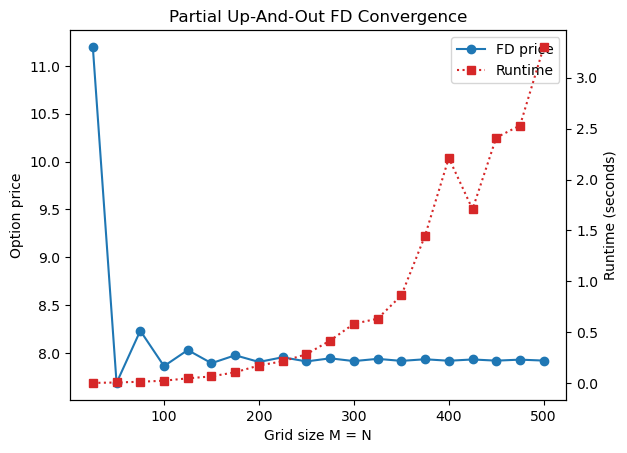

In [41]:
# Plot FD convergence results
plot_fd_convergence_results(
    size=Ms, 
    prices=fd_prices,
    times=fd_times,
    title="Partial Up-And-Out FD Convergence",
    savefile="partial_up_and_out_fd_convergence.png",
)

### Monte Carlo Convergence

In [42]:
params = {
    "S0":100,
    "h":lambda x: np.maximum(x - 100, 0.0),
    "B":130,
    "Pi": [(0,0.5)],
    "T":1.0,
    "r":0.05,
    "sigma":0.2,
}

# Run MC convergence test
Ns, mc_prices, mc_errs, mc_times = mc_convergence(
   PartialUpAndOutMC, params, Ns, 252*4
)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [15:54<00:00, 38.17s/it]


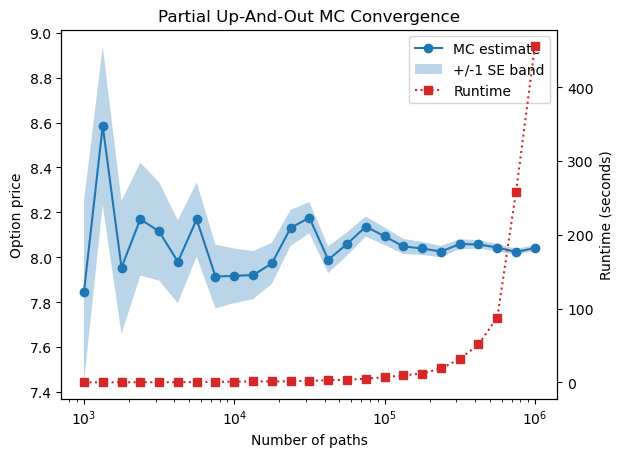

In [43]:
mc_prices = np.array(mc_prices)
mc_errs = np.array(mc_errs)
mc_times = np.array(mc_times)

# Plot FD convergence results
plot_mc_convergence_results(
    size=Ns, 
    prices=mc_prices,
    errs=mc_errs,
    times=mc_times,
    title="Partial Up-And-Out MC Convergence",
    savefile="partial_up_and_out_mc_convergence.png",
)

# Modified Barrier Options

### Finite Difference Method

In [16]:
# Example of modified FD pricer
pricer = ModifiedUpAndOutFD(
    S0=100, h = lambda x: np.maximum(x-100, 0.0), Phi= lambda x: np.exp(-x),
    B=130, T=1.0, r=0.05, sigma=0.2, x_max=1000, M=50, K=50, N=50,
    continuous=False
)

price = pricer.price()
print(f"FD Price: {price:.4f}")

FD Price: 7.5484


### Monte Carlo Method

In [17]:
# Example of modified MC pricer
pricer = ModifiedUpAndOutMC(
    S0=100, h = lambda x: np.maximum(x-100, 0.0), Phi= lambda x: np.exp(-x),
    B=130, T=1.0, r=0.05, sigma=0.2, n_sims=10000, n_steps=1000,
    continuous=False
)

price = pricer.price()
print(f"MC Price: {price:.4f}")

FD Price: 8.8794


### Finite Difference Convergence

In [26]:
# Define param grid
params = {
    "S0":100,
    "h":lambda x: np.maximum(x - 100, 0.0),
    "Phi": lambda x: np.exp(-x),
    "B":130,
    "T":1.0,
    "r":0.05,
    "sigma":0.2,
    "x_max": 1000
}

# Create Ms list
Ms = range(25, 501, 25)

# Run FD convergence test
Ms, fd_prices, fd_times = fd_convergence(ModifiedUpAndOutFD, params, Ms)

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:52:59<00:00, 338.95s/it]


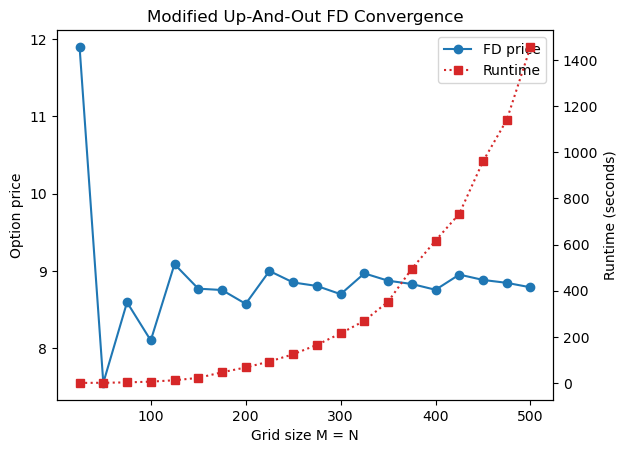

In [27]:
# Plot FD convergence results
plot_fd_convergence_results(
    size=Ms, 
    prices=fd_prices,
    times=fd_times,
    title="Modified Up-And-Out FD Convergence",
    savefile="modified_up_and_out_fd_convergence.png",
)

### Monte Carlo Convergence

In [22]:
params = {
    "S0":100,
    "h":lambda x: np.maximum(x - 100, 0.0),
    "Phi": lambda x: np.exp(-x),
    "B":130,
    "T":1.0,
    "r":0.05,
    "sigma":0.2,
}

# Run MC convergence test
Ns, mc_prices, mc_errs, mc_times = mc_convergence(
   ModifiedUpAndOutMC, params, Ns, 252*4
)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [14:17<00:00, 34.29s/it]


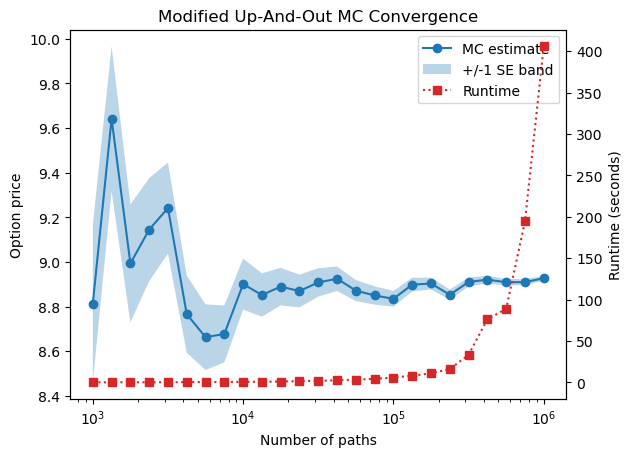

In [24]:
mc_prices = np.array(mc_prices)
mc_errs = np.array(mc_errs)
mc_times = np.array(mc_times)

# Plot FD convergence results
plot_mc_convergence_results(
    size=Ns, 
    prices=mc_prices,
    errs=mc_errs,
    times=mc_times,
    title="Modified Up-And-Out MC Convergence",
    savefile="modified_up_and_out_mc_convergence.png",
)